# Diabetes Classification Using Support Vector Machine & K-Means Clustering:   

@Author: Komal Wavhal

## Problem Statement: 
- Diabetes, a prevalent chronic disease, affects millions of people worldwide and is linked to severe complications such as heart disease, vision loss, and kidney failure. Early detection of diabetes can significantly improve treatment outcomes and reduce healthcare costs. This problem can be addressed by developing predictive models to identify individuals at risk of developing diabetes or prediabetes.

- The dataset from the CDC’s Behavioral Risk Factor Surveillance System (BRFSS) for 2015 contains responses from 70,692 individuals, equally split between those with diabetes or prediabetes (class 1) and those without (class 0). The dataset includes 21 feature variables related to health behaviors and conditions, providing an opportunity to build a classification model to predict diabetes risk.

- The goal of this project is to create a machine learning model that can accurately classify individuals into two categories: those at risk of diabetes (prediabetes or diabetes) and those who are not. Such a model would support early diagnosis, allowing for timely interventions to manage and potentially prevent the disease.

## About Dataset: 
- diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

### 1. Importing Necessary Libraries:

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [14]:
#Update the path as per your system path.
file_path = r"C:\Users\priya\VS_Code_Projects\07_Diabetes_Health_Indicator_Dataset\data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

### 2. Loading the Dataset:

In [15]:
def load_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully! Shape: {df.shape}")
    return df

In [16]:
df = load_data(file_path)

Data loaded successfully! Shape: (70692, 22)


In [17]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


### 3. Exploring the Dataset:

In [18]:
def explore_data(df):
    
    # 1. Checking data sizes and all columns details
    print("\n Total rows in the dataset are:", df.shape[0])
    print("\n Total columns in the dataset are:", df.shape[1])
    print("\n List of all the columns are:", df .columns)


    # 2. Checking for missing values and data types
    has_missing_values = df.isnull().values.any()
    print("\nDoes data have any missing values?", has_missing_values)
    print("\nData Types:\n", df.dtypes)


    # 3. Checking for duplicates & uniqueness of data points:
    total_rows = len(df) # Get the total number of rows
    has_duplicates = df.duplicated().any() # Print True if there are duplicates, False otherwise
    print("\n Does data have any duplicates?", has_duplicates)
    num_duplicates = df.duplicated().sum() # Get the number of duplicate rows
    num_unique = total_rows - num_duplicates # Get the number of unique rows

    print(f"\n Total number of rows are: {total_rows}")
    print(f"\n Total Number of duplicate rows are: {num_duplicates}")
    print(f"\n Total Number of unique rows are: {num_unique}")


    # 4. Identifying Types of Columns:
    # numerical columns (columns with numeric types)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Identifying categorical columns (columns with non-numeric types)
    categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

    # Print the results or message if no columns are found
    if not numerical_cols:
        print("Numerical columns are not available.")
    else:
        print(f"Numerical Columns: {numerical_cols}")
    
    if not categorical_cols:
        print("Categorical columns are not available.")
    else:
        print(f"Categorical Columns: {categorical_cols}")

In [19]:
explore_data(df)


 Total rows in the dataset are: 70692

 Total columns in the dataset are: 22

 List of all the columns are: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Does data have any missing values? False

Data Types:
 Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth          

##### Data Exploration Outcome:
- There are no missing values.
- All columns are numeric.
- There are no categorical values.
- Total Rows: 70692
- Total Columns: 22
- List of All Columns:
    - Input Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
    - Output Target: ['Diabetes_binary']
- All the columns are float64 datatype and to retain their precision, they haven't been converted into int64 or int32
- Total 1635 duplicate records have been observed and would need to be removed.

In [20]:
# Check for duplicate rows
df.duplicated().sum()
df.shape
# Remove duplicates if necessary
df.drop_duplicates(inplace=True)
df.shape

(69057, 22)

- Duplicate records have been eliminated.
- Total unique records are 69057

### 3. Performing Exploratory Data Analysis:

In [21]:
#3.1 Descriptive Analytics:
def descriptive_analysis(df):
    """
    Perform descriptive analysis on the dataset to get an overview of numerical features.
    """
    # Basic summary statistics for numerical features
    print("Basic Descriptive Statistics for Numerical Features:\n")
    print(df.describe())  # Summary statistics for numerical columns

In [22]:
descriptive_analysis(df)

Basic Descriptive Statistics for Numerical Features:

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     69057.000000  69057.000000  69057.000000  69057.000000   
mean          0.508232      0.571224      0.531329      0.974803   
std           0.499936      0.494905      0.499021      0.156723   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           1.000000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  69057.000000  69057.000000  69057.000000          69057.000000   
mean      29.955834      0.481935      0.063643              0.150875   
std        7.147972      0.499677      0.244118              0.357930   
min       12.000000      0.000000      0.

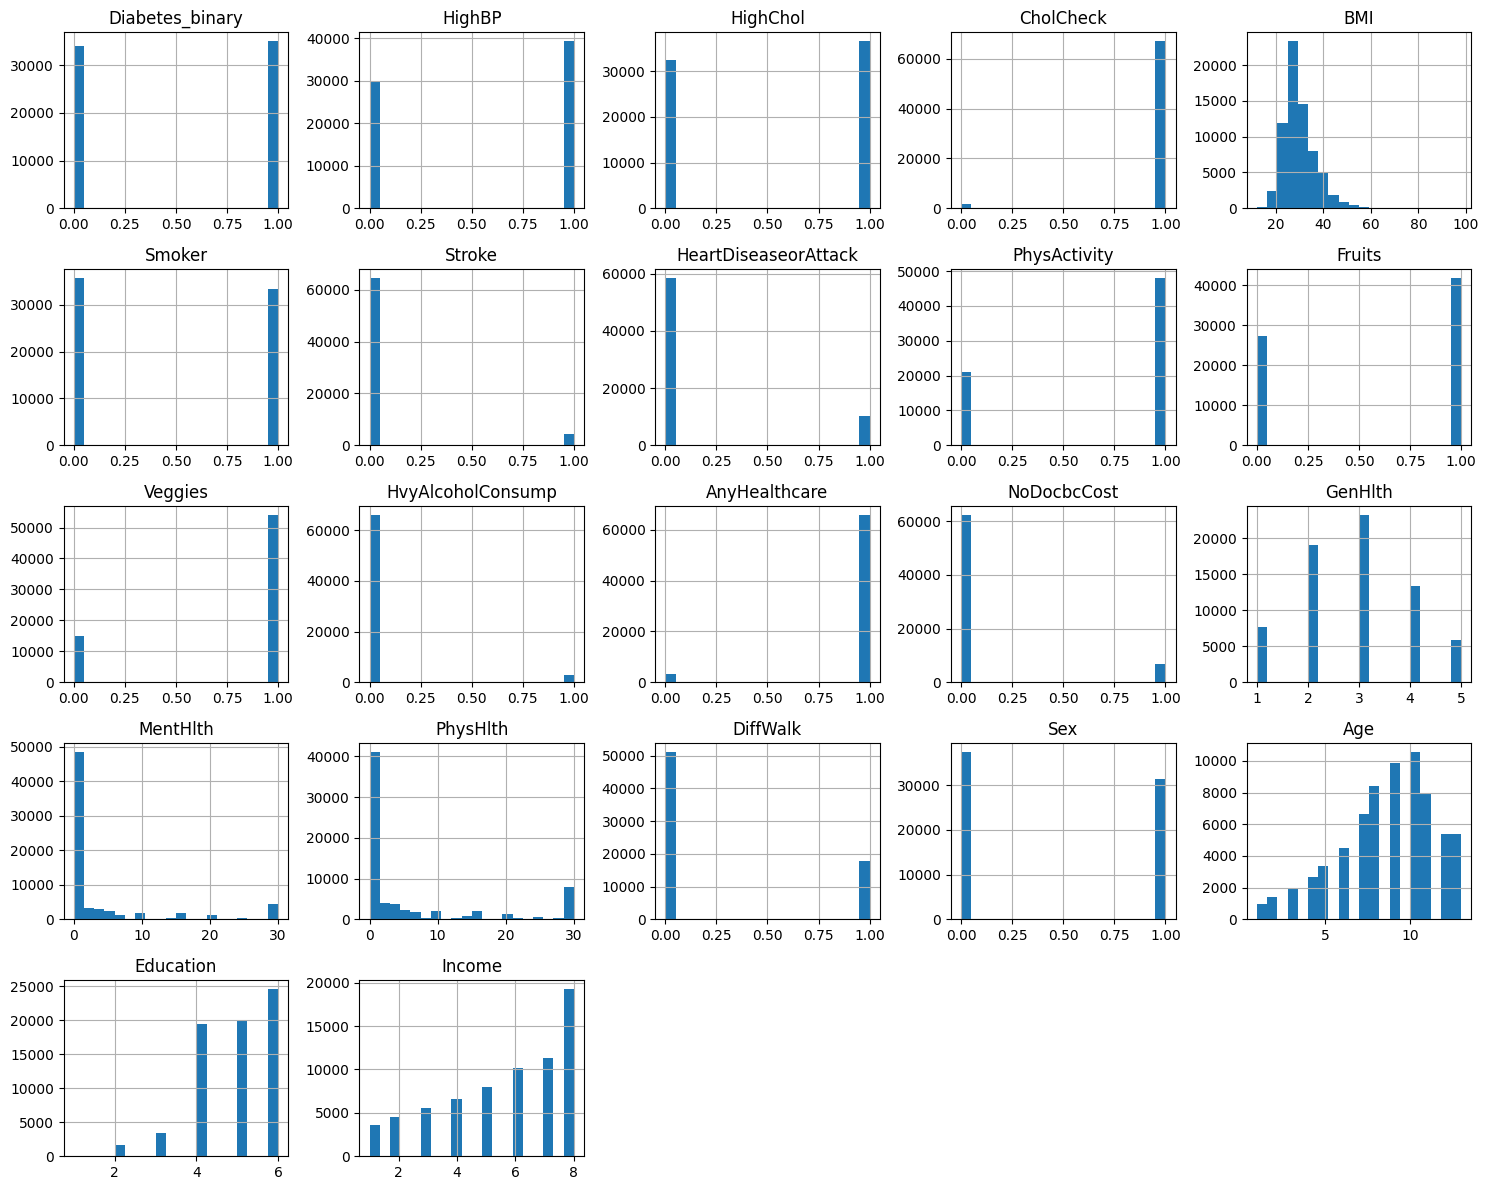

In [23]:
df.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_all_columns(df):
    """
    Plot boxplots for all numerical columns in the dataframe.
    
    Parameters:
    - df: DataFrame containing the dataset.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create a figure with multiple subplots (one for each numerical column)
    num_cols = len(numerical_cols)
    rows = num_cols // 3 + (1 if num_cols % 3 != 0 else 0)  # Calculate number of rows for subplots

    plt.figure(figsize=(15, 5 * rows))  # Adjust size depending on the number of columns
    
    for i, col in enumerate(numerical_cols):
        plt.subplot(rows, 3, i + 1)  # Create a subplot for each column
        sns.boxplot(x=df[col], color='grey')
        plt.title(f'Boxplot of {col}', fontsize=14)
        plt.xlabel(f'{col} values')
        plt.grid(True)
    
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()


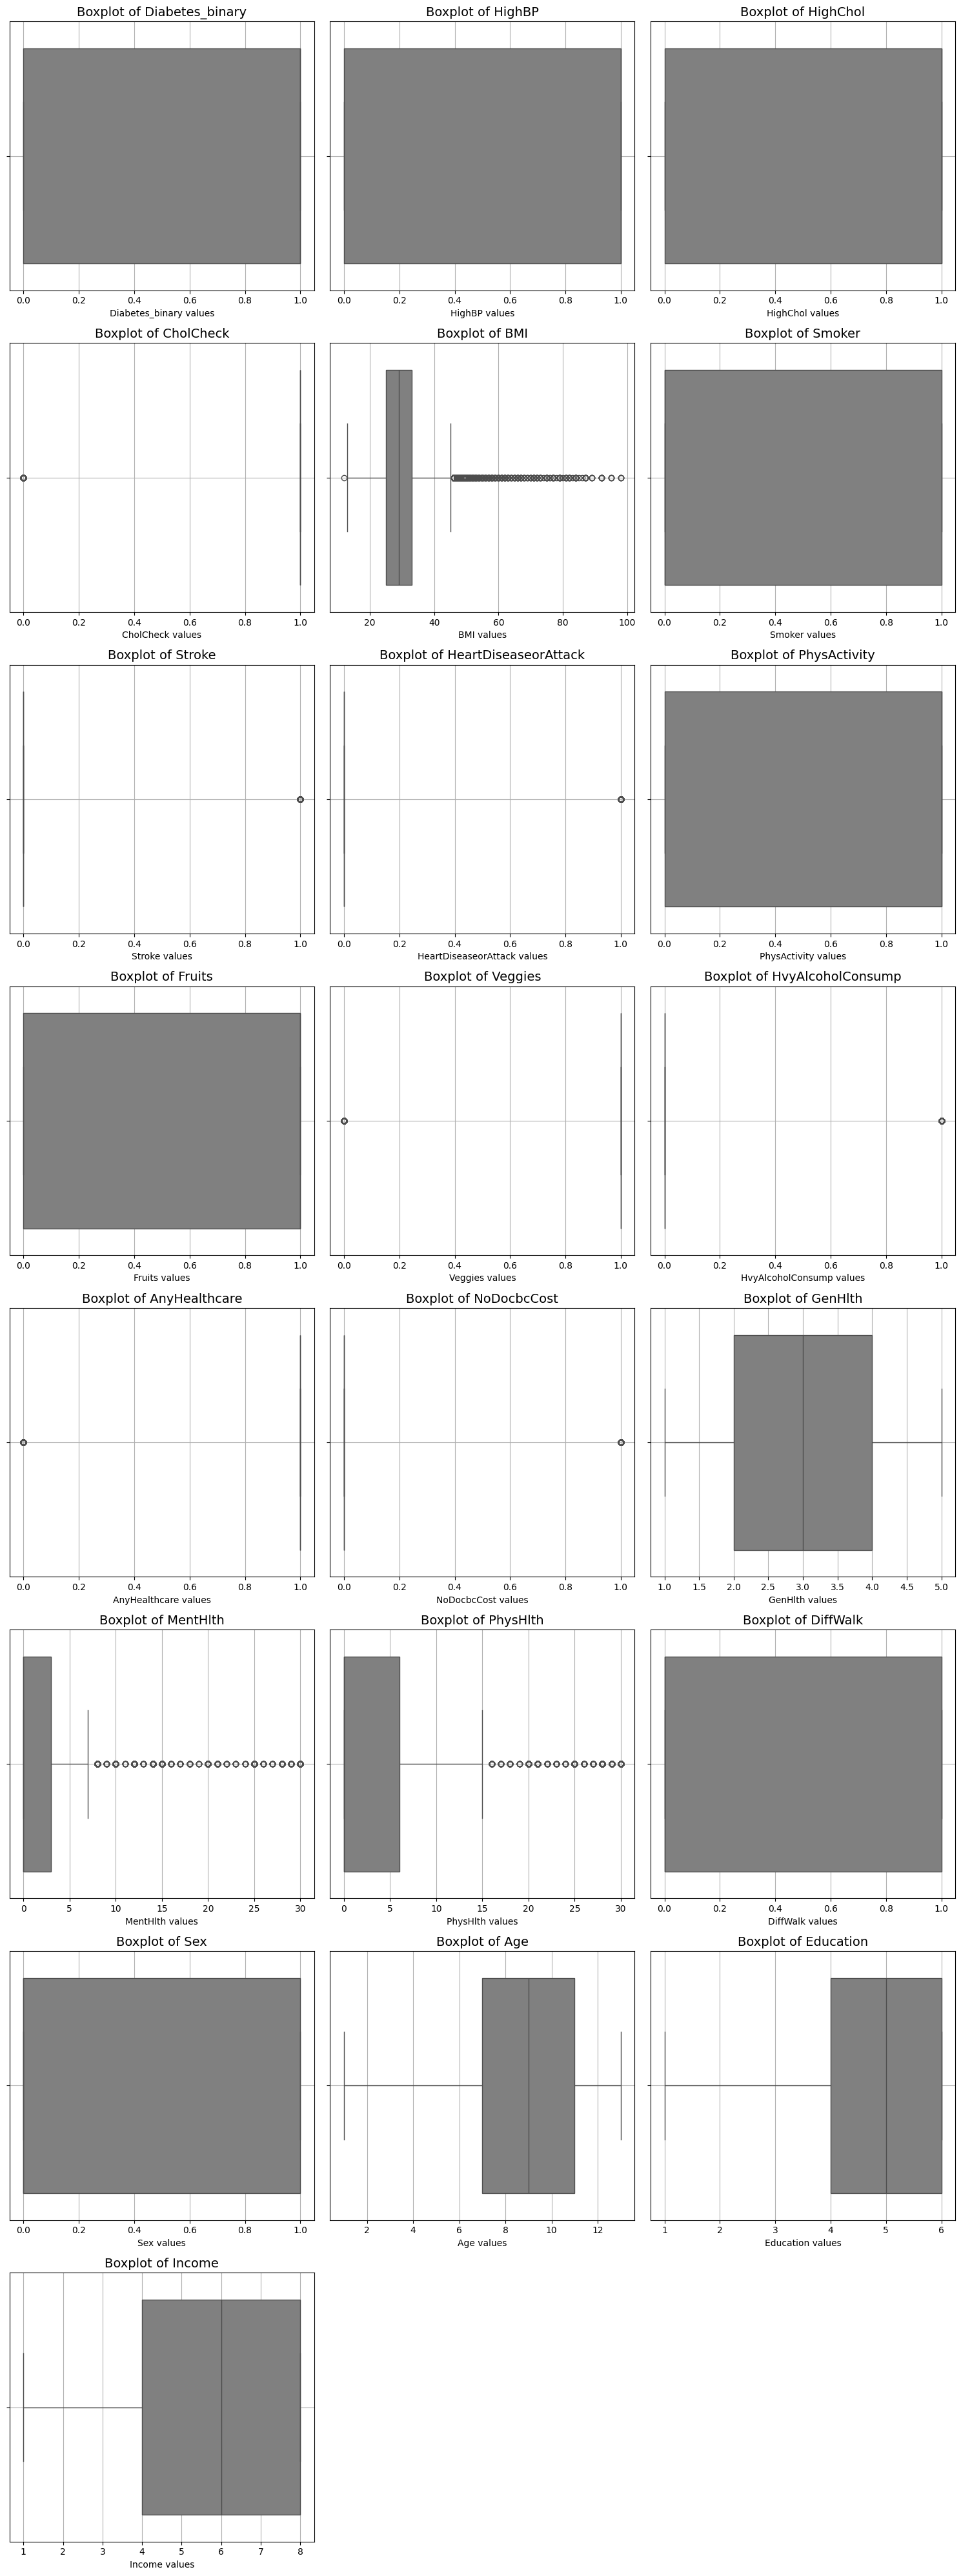

In [25]:
# Call the function to plot boxplots for all numerical columns
plot_boxplots_for_all_columns(df)

Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64


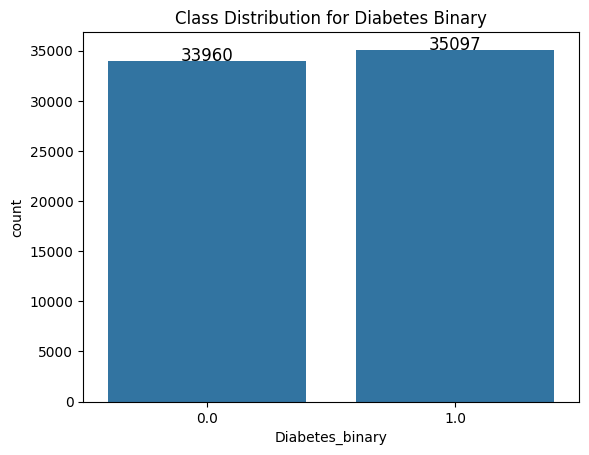

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable
print(df['Diabetes_binary'].value_counts())

# Create the countplot for the target variable
ax = sns.countplot(x='Diabetes_binary', data=df)

# Title of the plot
plt.title('Class Distribution for Diabetes Binary')

# Add the value labels on top of the bars
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.text(p.get_x() + p.get_width() / 2., height + 5,  # Position the text slightly above the bar
            int(height),  # The actual value (height of the bar)
            ha="center",  # Horizontal alignment
            fontsize=12,   # Font size
            color='black') # Text color

# Show the plot
plt.show()


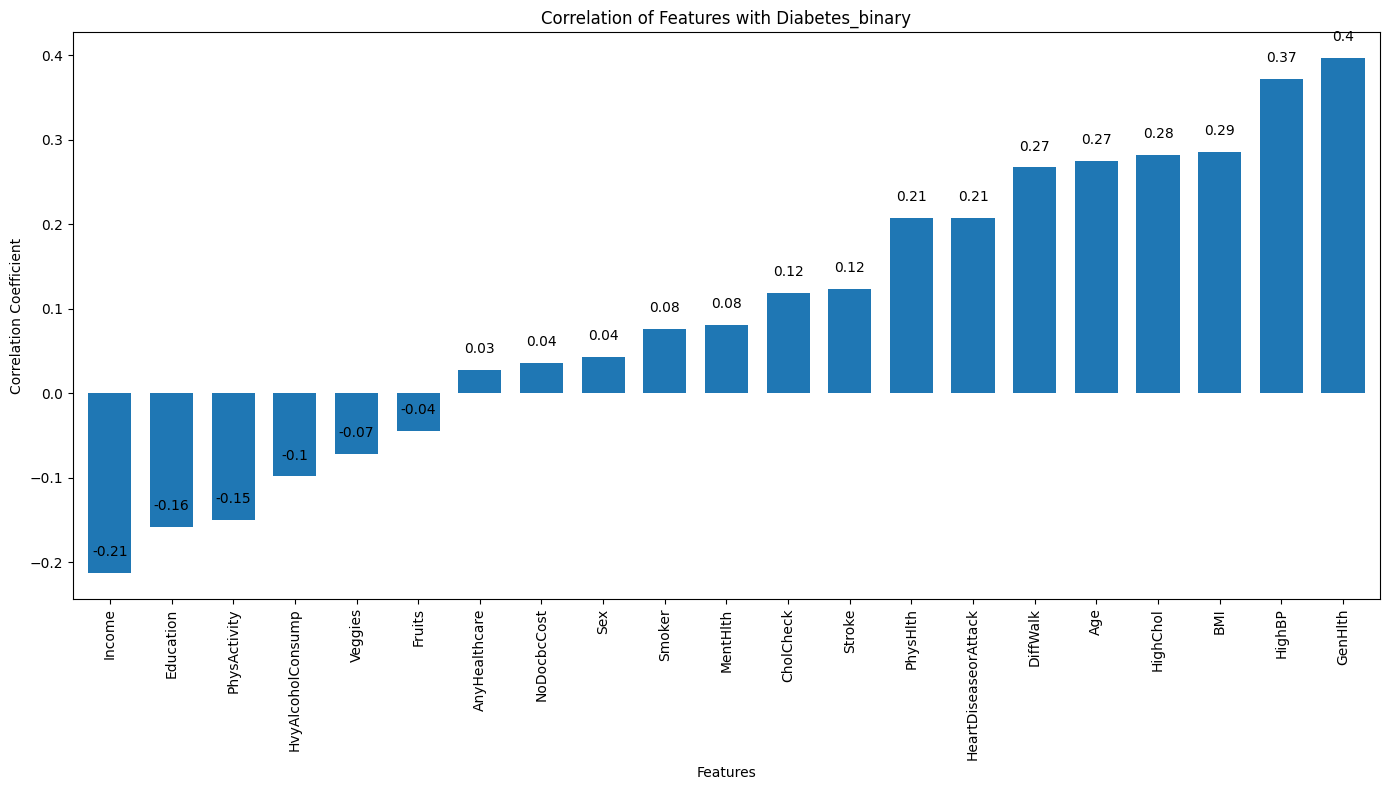

In [27]:
import matplotlib.pyplot as plt

# Assuming df.corr()['Diabetes_binary'] is already computed

# Create the bar plot for the correlation values
ax = df.corr()['Diabetes_binary'][1:].sort_values().plot(kind='bar', figsize=(14, 8), width=0.7)

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Position text slightly above the bar
            round(height, 2),  # Round the value for better readability
            ha="center",  # Horizontal alignment
            fontsize=10,   # Font size for the value labels
            color='black') # Text color

# Title and labels
plt.title('Correlation of Features with Diabetes_binary', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=10)
plt.xlabel('Features', fontsize=10)

# Adjust layout to prevent unnecessary padding and maximize space
plt.tight_layout()

# Display the plot
plt.show()

In [28]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [29]:
# Select the top 8 most important features or the ones with highest correlation with the target
#greater than 0.21 have been selected based on above chart.
top_selected_features = ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack','PhysHlth']


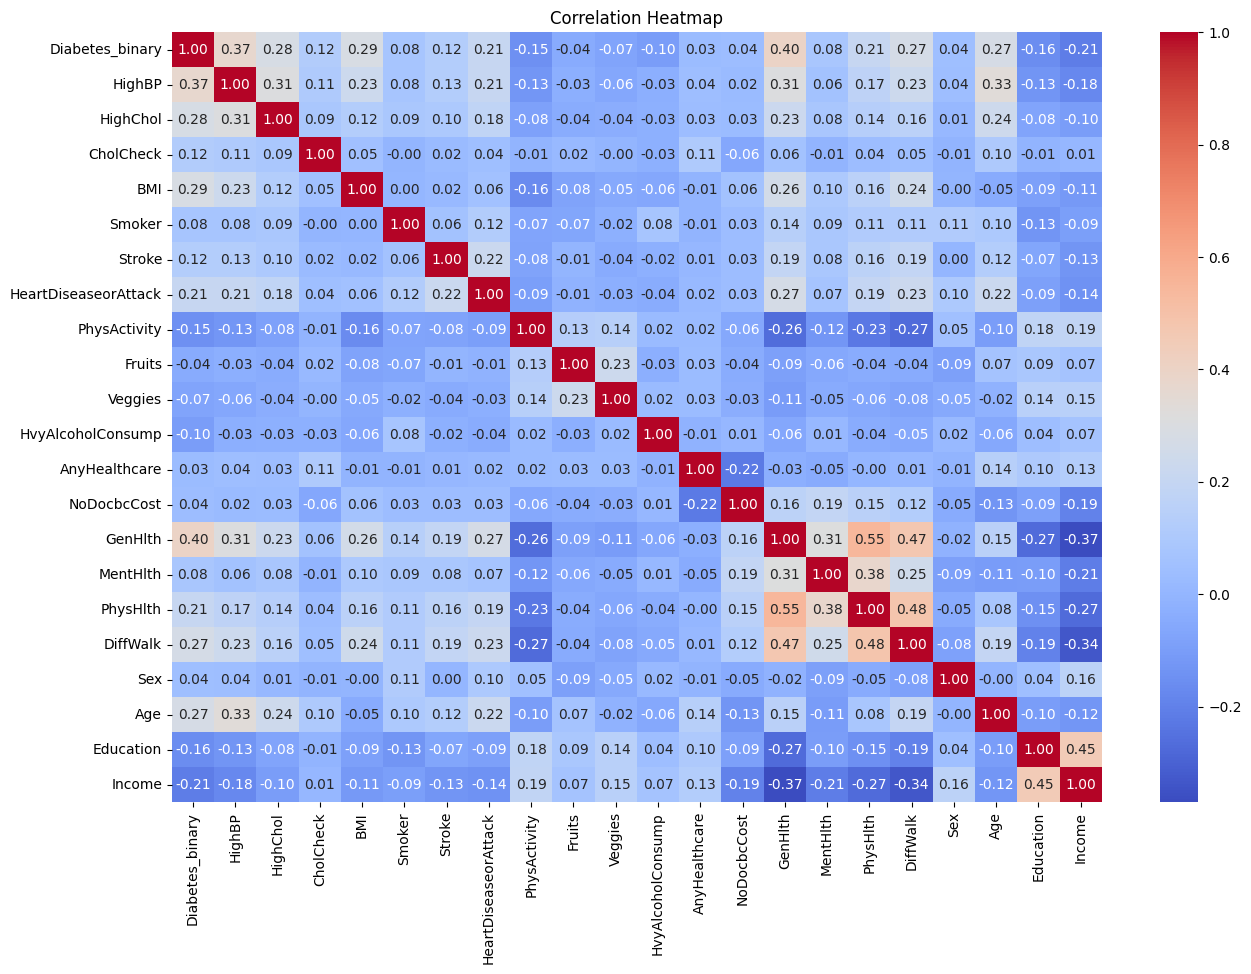

In [30]:
# Compute the correlation matrix for numerical features
corr_matrix = df.corr() #Pearson correlation.

# Plot heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- As there were outliers observed in the box plot of 'PhysHlth', 'MentHlth', 'BMI', we would be removing those using IQR (Q3 - Q1)

In [31]:
def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Remove outliers using the IQR method from specified columns in the dataframe.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - columns: List of column names to remove outliers from.
    - multiplier: The IQR multiplier to define outliers (default is 1.5).
    
    Returns:
    - DataFrame with outliers removed from the specified columns.
    """
    df_cleaned = df.copy()  # Copy to avoid modifying the original dataframe
    
    for column in columns:
        # Calculate the 1st (Q1) and 3rd (Q3) quartiles
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Calculate the outlier bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Filter out the outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        
    return df_cleaned

In [32]:
# Call the function to remove outliers from the columns 'PhysHlth', 'MentHlth', 'BMI'
df_cleaned = remove_outliers_iqr(df, columns=['PhysHlth', 'MentHlth', 'BMI'], multiplier=1.5) #as outliers were observed here,

# Verify the results
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (69057, 22)
Cleaned DataFrame shape: (50162, 22)


In [33]:
df_cleaned.shape

(50162, 22)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Define features and target
X = df_cleaned.drop(columns=['Diabetes_binary'])
y = df_cleaned['Diabetes_binary']  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
df_cleaned.shape

(50162, 22)

In [36]:
X_scaled.shape

(50162, 21)

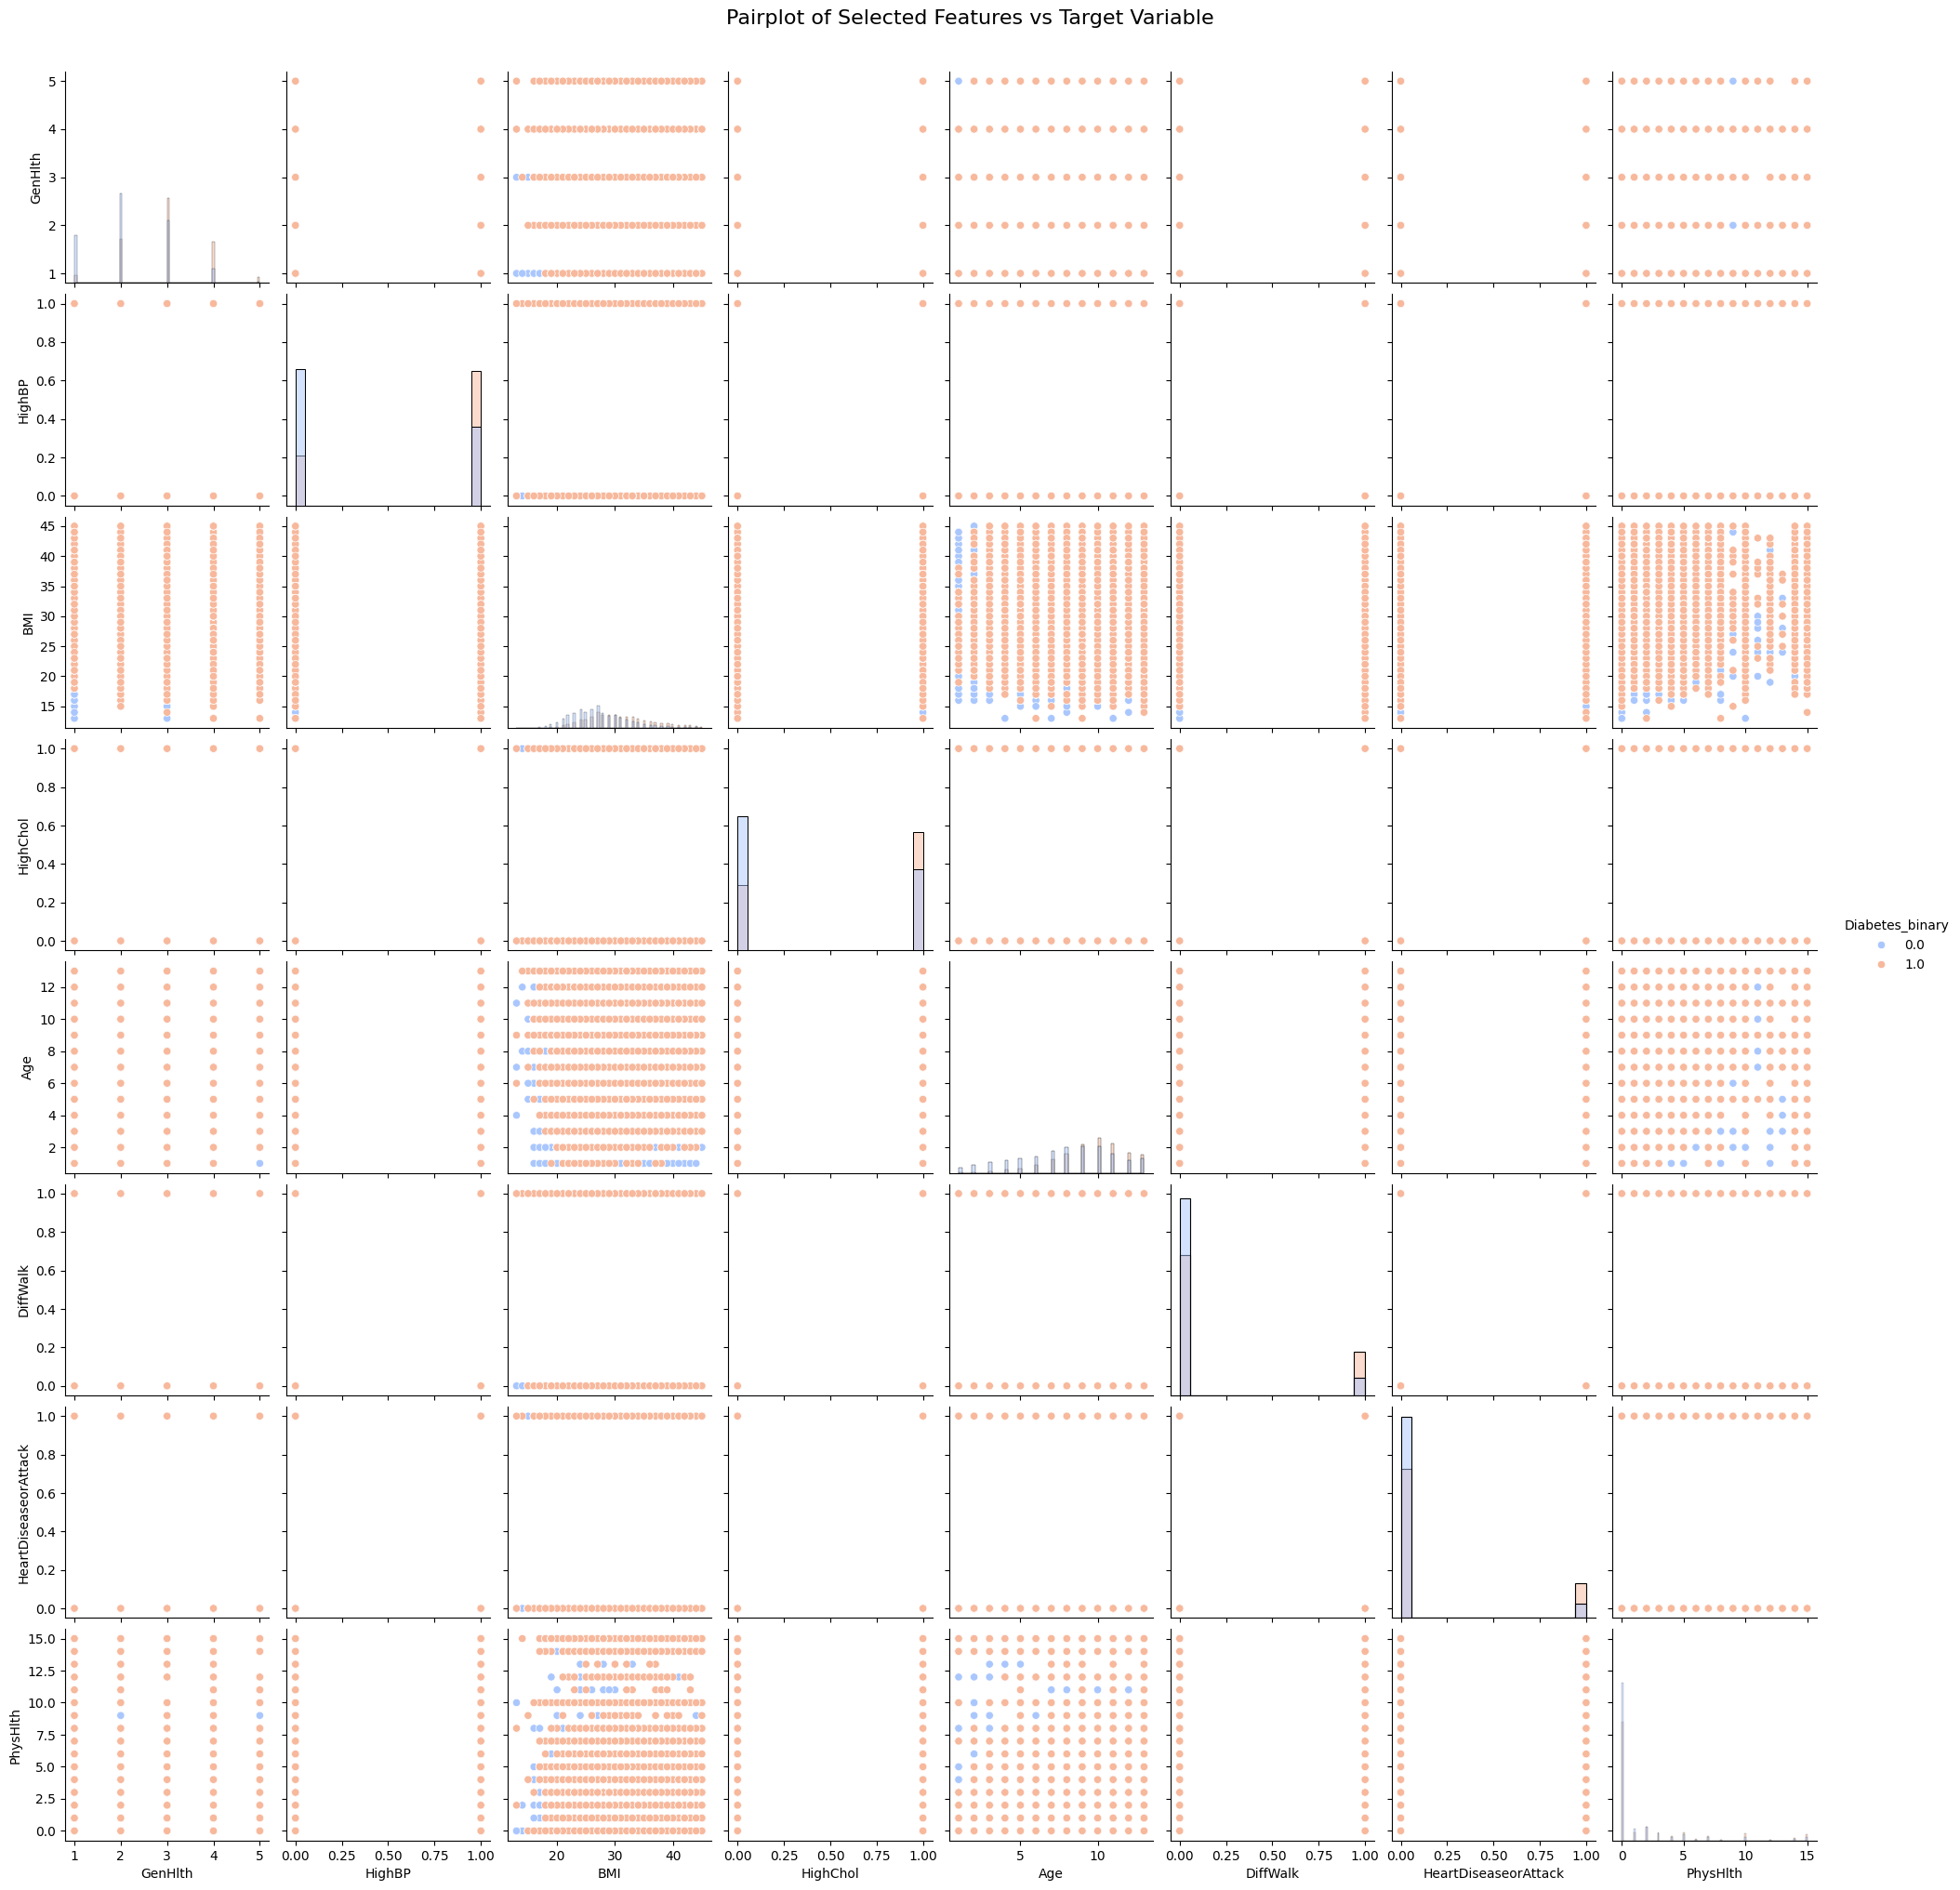

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot pairplot for selected features
def plot_pairplot_selected_features(df_cleaned, top_selected_features, target_variable):
    """
    This function generates a pairplot for the selected features with respect to the target variable.
    
    Parameters:
    - df: DataFrame containing the dataset with numerical features.
    - selected_features: List of features to include in the pairplot.
    - target_variable: The name of the target variable (e.g., 'Diabetes_binary').
    """
    # Create a subset of the dataframe with the selected features and the target variable
    df_subset = df_cleaned[top_selected_features + [target_variable]]
    
    # Plot the pairplot for the selected subset of features
    sns.pairplot(df_subset, hue=target_variable, palette='coolwarm', diag_kind='hist')
    plt.suptitle(f'Pairplot of Selected Features vs Target Variable', fontsize=16, y=1.02)
    plt.show()

# Example usage:
# Assuming df_cleaned is your cleaned DataFrame and 'Diabetes_binary' is your target variable
top_selected_features = ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth']
plot_pairplot_selected_features(df_cleaned, top_selected_features, target_variable='Diabetes_binary')

### Model: SVM

In [38]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to preprocess data, train SVM, and evaluate the model
def svm_model(df, target_variable):
    """
    This function preprocesses the data, trains an SVM classifier model, 
    and evaluates its performance.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_variable: The name of the target variable (e.g., 'Diabetes_binary').
    
    Returns:
    - The trained SVM model and evaluation metrics.
    """
    
    
    # Step 3: Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Step 4: Train Support Vector Machine (SVM) Model
    svm_model = SVC(kernel='linear', random_state=42)  # You can change kernel to 'rbf' for non-linear
    svm_model.fit(X_train, y_train)
    
    # Step 5: Make predictions
    y_pred = svm_model.predict(X_test)
    
    # Step 6: Evaluate the Model
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Print Evaluation Metrics
    print("Author: Komal Wavhal (20034443)")
    print("Accuracy of SVM Model:", accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    
    return svm_model, accuracy, conf_matrix, class_report

# Example usage:
# Assuming df_cleaned is your cleaned DataFrame and 'Diabetes_binary' is your target variable
svm_model(df_cleaned, target_variable='Diabetes_binary')

Author: Komal Wavhal (20034443)
Accuracy of SVM Model: 0.7384630718628525

Confusion Matrix:
 [[4018 1410]
 [1214 3391]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.74      0.75      5428
         1.0       0.71      0.74      0.72      4605

    accuracy                           0.74     10033
   macro avg       0.74      0.74      0.74     10033
weighted avg       0.74      0.74      0.74     10033



(SVC(kernel='linear', random_state=42),
 0.7384630718628525,
 array([[4018, 1410],
        [1214, 3391]]),
 '              precision    recall  f1-score   support\n\n         0.0       0.77      0.74      0.75      5428\n         1.0       0.71      0.74      0.72      4605\n\n    accuracy                           0.74     10033\n   macro avg       0.74      0.74      0.74     10033\nweighted avg       0.74      0.74      0.74     10033\n')

### Logistic Regression:

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to preprocess data, train logistic regression, and evaluate the model
def logistic_regression_model(df, target_variable):
    """
    This function preprocesses the data, trains a logistic regression model, 
    and evaluates its performance.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_variable: The name of the target variable (e.g., 'Diabetes_binary').
    
    Returns:
    - The trained logistic regression model and evaluation metrics.
    """
    
  
    
    # Step 3: Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Step 4: Train Logistic Regression Model
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    
    # Step 5: Make predictions
    y_pred = logistic_regression.predict(X_test)
    
    # Step 6: Evaluate the Model
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Print Evaluation Metrics
    print("Accuracy of Logistic Regression Model:", accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    
    return logistic_regression, accuracy, conf_matrix, class_report

# Example usage:
# Assuming df_cleaned is your cleaned DataFrame and 'Diabetes_binary' is your target variable
logistic_regression_model(df_cleaned, target_variable='Diabetes_binary')


Accuracy of Logistic Regression Model: 0.7350742549586365

Confusion Matrix:
 [[4105 1323]
 [1335 3270]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76      5428
         1.0       0.71      0.71      0.71      4605

    accuracy                           0.74     10033
   macro avg       0.73      0.73      0.73     10033
weighted avg       0.74      0.74      0.74     10033



(LogisticRegression(),
 0.7350742549586365,
 array([[4105, 1323],
        [1335, 3270]]),
 '              precision    recall  f1-score   support\n\n         0.0       0.75      0.76      0.76      5428\n         1.0       0.71      0.71      0.71      4605\n\n    accuracy                           0.74     10033\n   macro avg       0.73      0.73      0.73     10033\nweighted avg       0.74      0.74      0.74     10033\n')

### XGBOOST:

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to preprocess data, train XGBoost model, and evaluate the model
def xgboost_model(df, target_variable):
    """
    This function preprocesses the data, trains an XGBoost classifier model, 
    and evaluates its performance.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - target_variable: The name of the target variable (e.g., 'Diabetes_binary').
    
    Returns:
    - The trained XGBoost model and evaluation metrics.
    """
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Step 4: Train XGBoost Model
    xgboost_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    xgboost_model.fit(X_train, y_train)
    
    # Step 5: Make predictions
    y_pred = xgboost_model.predict(X_test)
    
    # Step 6: Evaluate the Model
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Print Evaluation Metrics
    print("Accuracy of XGBoost Model:", accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    
    return xgboost_model, accuracy, conf_matrix, class_report

# Example usage:
# Assuming df_cleaned is your cleaned DataFrame and 'Diabetes_binary' is your target variable
xgboost_model(df_cleaned, target_variable='Diabetes_binary')


c:\Users\priya\VS_Code_Projects\07_Diabetes_Health_Indicator_Dataset\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [06:37:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBoost Model: 0.7284959633210406

Confusion Matrix:
 [[3966 1462]
 [1262 3343]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      5428
         1.0       0.70      0.73      0.71      4605

    accuracy                           0.73     10033
   macro avg       0.73      0.73      0.73     10033
weighted avg       0.73      0.73      0.73     10033



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...),
 0.7284959633210406,
 array([[3966, 1462],
        [1262, 3343]]),
 '              precision    recall  f1-score   support\n\n         0.0       0.76      0.73      0.74      5428\n         1.0       0.70      0.73      0.71 

### Evaluation of Multiple Models Together:

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the model and calculates key metrics: accuracy, precision, recall, F1-score, AUC, Log Loss, and MCC.
    
    Parameters:
    - model: The trained model.
    - X_train: Training features.
    - X_test: Test features.
    - y_train: Training labels.
    - y_test: Test labels.
    
    Returns:
    - A dictionary containing accuracy, precision, recall, F1-score, AUC
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
    
    # Compute various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc": auc
    }


### Keeping the Data Ready for final Modelling:

In [44]:
# df_cleaned is our dataset
X = df_cleaned.drop(columns=['Diabetes_binary'])
y = df_cleaned['Diabetes_binary']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
#Takes less than 1 second:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Evaluate the model
logreg_results = evaluate_model(logreg, X_train, X_test, y_train, y_test)

# Store the results
logreg_results

{'accuracy': 0.7350742549586365,
 'precision': np.float64(0.7119529719137818),
 'recall': np.float64(0.7100977198697068),
 'f1_score': np.float64(0.7110241356816699),
 'auc': np.float64(0.8147699386380348)}

### SVM Code for Final Evaluation:

In [48]:
#Takes around 20 min 15 secs:
from sklearn.svm import SVC

# Initialize SVM model
svm = SVC(kernel='linear', probability=True)

# Evaluate the model
svm_results = evaluate_model(svm, X_train, X_test, y_train, y_test)

# Store the results
svm_results

{'accuracy': 0.7384630718628525,
 'precision': np.float64(0.7063111851697563),
 'recall': np.float64(0.7363735070575461),
 'f1_score': np.float64(0.7210291303423347),
 'auc': np.float64(0.8147325125600396)}

In [58]:
### SVM Code with ROC AUC Curves:

Evaluation Results: {'accuracy': 0.7384630718628525, 'precision': np.float64(0.7063111851697563), 'recall': np.float64(0.7363735070575461), 'f1_score': np.float64(0.7210291303423347), 'auc': np.float64(0.8147316124138559)}
Author: Komal Wavhal(20034443)
Author: Komal Wavhal(20034443)


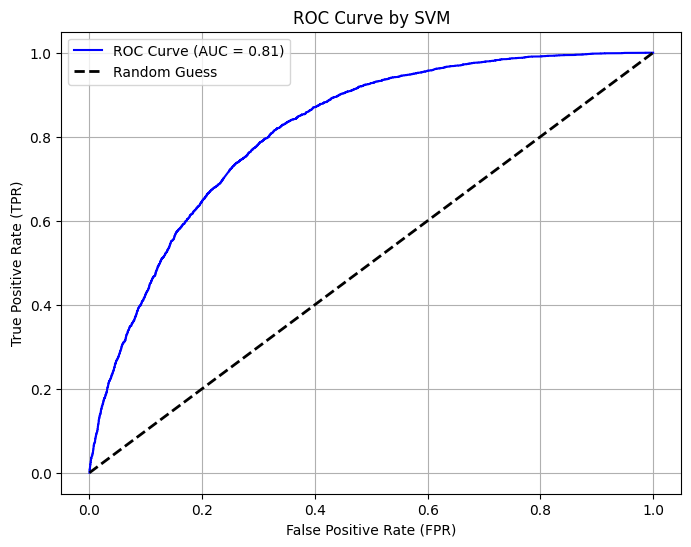

Author: Komal Wavhal(20034443)


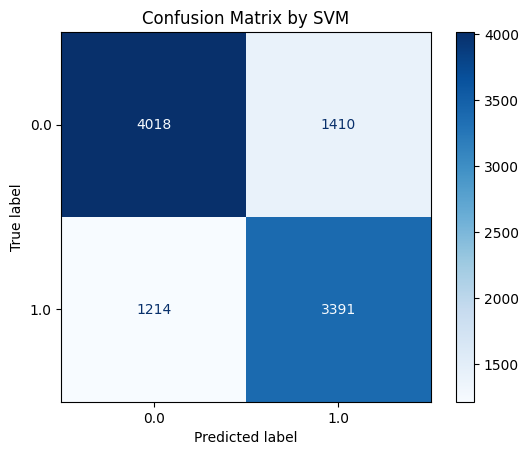

In [ ]:
#This execution takes around 40 minutes.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, confusion_matrix

# Takes around 20 min 15 secs: 
from sklearn.svm import SVC

# Initialize SVM model
svm = SVC(kernel='linear', probability=True)

# Evaluate the model
svm_results = evaluate_model(svm, X_train, X_test, y_train, y_test)

# Store the results
print("Evaluation Results:", svm_results)

# Plot ROC Curve
def plot_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    print("Author: Komal Wavhal(20034443)")
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {svm_results['auc']:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    print("Author: Komal Wavhal(20034443)")
    plt.title("ROC Curve by SVM")
    plt.legend()
    plt.grid()
    plt.show()

# Plot Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format="d")
    print("Author: Komal Wavhal(20034443)")
    plt.title("Confusion Matrix by SVM")
    plt.show()

# Fit and Plot Results
svm.fit(X_train, y_train)

# Call plotting functions
plot_roc_curve(svm, X_test, y_test)
plot_confusion_matrix(svm, X_test, y_test)


In [49]:
#Takes around 6 seconds:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier()

# Evaluate the model
rf_results = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Store the results
rf_results


{'accuracy': 0.7135453005083225,
 'precision': np.float64(0.6808777429467084),
 'recall': np.float64(0.7074918566775245),
 'f1_score': np.float64(0.6939297124600639),
 'auc': np.float64(0.7863554041176287)}

In [50]:
#Takes around 1 seconds:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Evaluate the model
xgb_results = evaluate_model(xgb, X_train, X_test, y_train, y_test)

# Store the results
xgb_results


c:\Users\priya\VS_Code_Projects\07_Diabetes_Health_Indicator_Dataset\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'accuracy': 0.7284959633210406,
 'precision': np.float64(0.6957336108220603),
 'recall': np.float64(0.7259500542888165),
 'f1_score': np.float64(0.7105207226354942),
 'auc': np.float64(0.8079355687363629)}

In [51]:
#Takes around 4 seconds
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of n_neighbors

# Evaluate the model
knn_results = evaluate_model(knn, X_train, X_test, y_train, y_test)

# Store the results
knn_results


{'accuracy': 0.7019834545998206,
 'precision': np.float64(0.6748971193415638),
 'recall': np.float64(0.6766558089033659),
 'f1_score': np.float64(0.6757753198872262),
 'auc': np.float64(0.7582660424052865)}

### Visualization of Comparison Metrics:

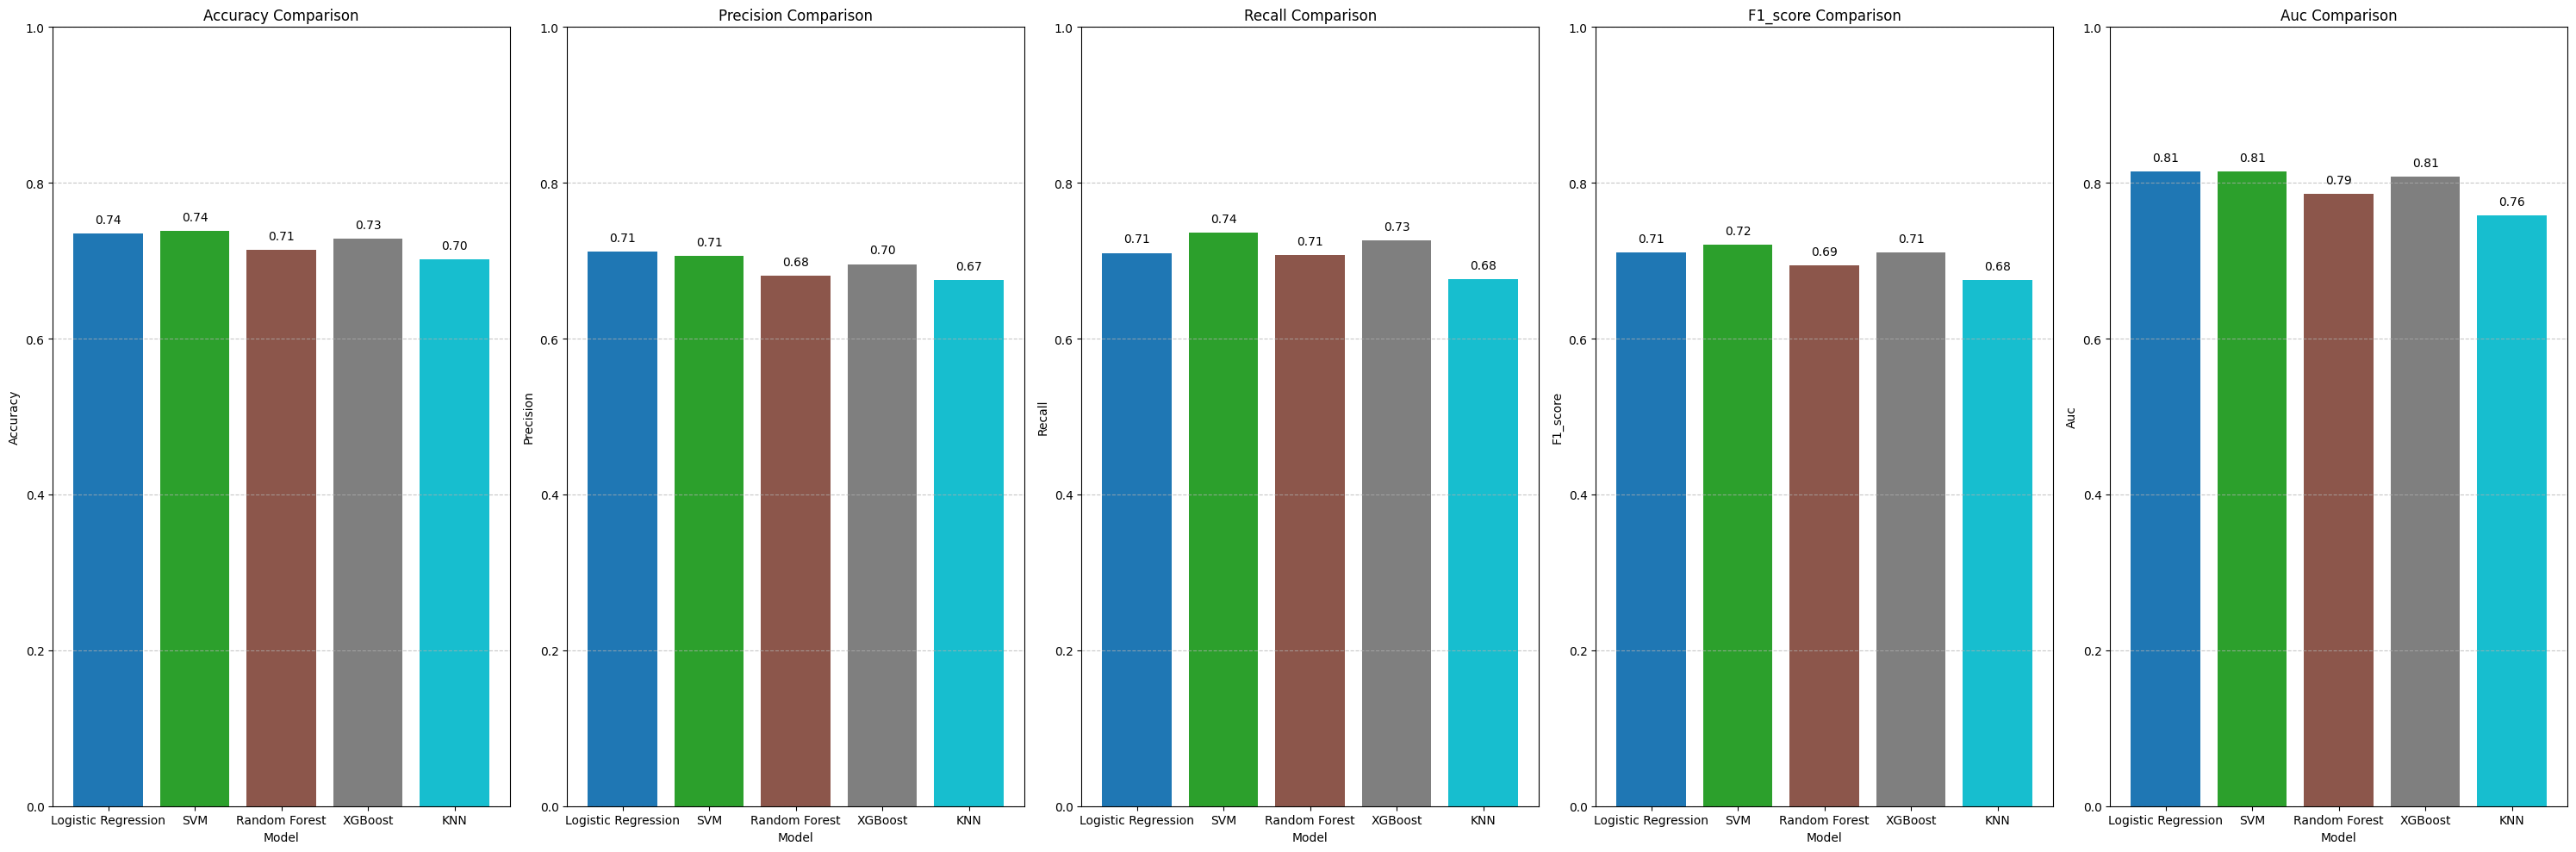

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the model_comparison dictionary has the results for each model stored
# Example model_comparison (replace this with your actual model results stored in the dictionary)
model_comparison = {
    "Logistic Regression": logreg_results,
    "SVM": svm_results,
    "Random Forest": rf_results,
    "XGBoost": xgb_results,
    "KNN": knn_results
}

# Define the metrics to compare
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']

# Create a plot for the comparison
fig, axes = plt.subplots(1, len(metrics), figsize=(30, 10))

# Define a color palette for the models (you can choose any color palette)
colors = plt.cm.tab10(np.linspace(0, 1, len(model_comparison)))  # Generate unique colors for each model

# Prepare data for plotting
for i, metric in enumerate(metrics):
    # Extract the metric values for each model from the model_comparison dictionary
    results = [model_comparison[model_name][metric] for model_name in model_comparison]
    
    # Plot the bar chart for the current metric
    bars = axes[i].bar(model_comparison.keys(), results, color=colors)
    axes[i].set_title(f'{metric.capitalize()} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_ylim(0, 1)  # Since metrics are probabilities, limit y-axis to 0-1
    
    # Add the grid for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()  # Get the height (value) of the bar
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.01,  # Positioning the value slightly above the bar
                     f'{yval:.2f}', ha='center', va='bottom', fontsize=10)  # Display the value with 2 decimal places

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### K-Means Clustering:

1) Using Elbow Method:  
- The Elbow Method is based on the idea of finding the "elbow" in the inertia (or SSE — sum of squared errors) plot. The inertia measures how well the data fits into clusters: lower inertia indicates better clustering. The elbow is the point where adding more clusters doesn't reduce inertia significantly.

- Limitations: The Elbow Method only considers how compact the clusters are (i.e., inertia), but doesn't account for how well-separated or cohesive the clusters are, which is what the Silhouette Score evaluates.

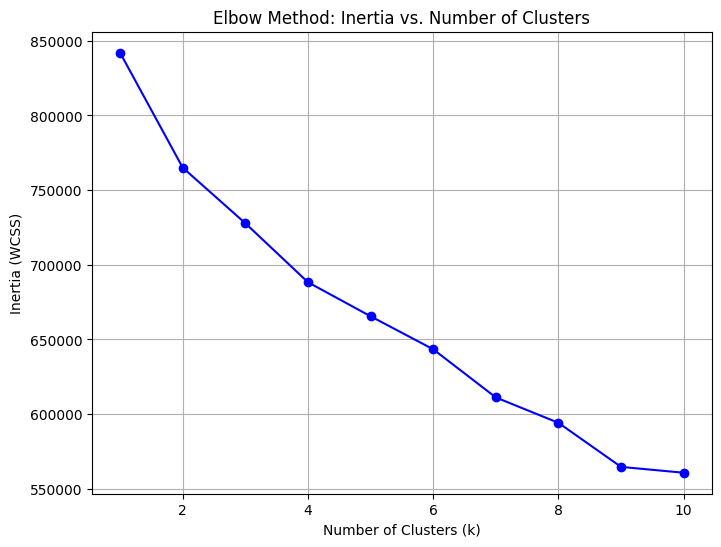

In [53]:
#Determining optimal number of Clusters:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values (WCSS)
inertia = []

# Range of k values to test (e.g., from 1 to 10)
k_range = range(1, 11)

# Fit KMeans for each k value and compute inertia (WCSS)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # Use X_train as your feature data
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

#Interpreting the Elbow Method Plot: 

- Inertia (WCSS): The y-axis represents the within-cluster sum of squares (WCSS), which measures the variance of the data points within each cluster. Lower WCSS generally indicates better clustering.

- Number of Clusters (K): The x-axis shows the different values of K that were tested.

- Identifying the Elbow Point:

- The Elbow Method aims to find the point where the rate of decrease in WCSS starts to slow down significantly. This point is often referred to as the "elbow" of the curve.
In this plot:

- There appears to be a distinct elbow around K = 4.
- After K = 4, the decrease in WCSS becomes less pronounced.
- Therefore, based on this Elbow Method plot, the optimal value for K is likely 4.

2) Using Silhouette Score:
- The graph you provided shows the Silhouette Scores for different numbers of clusters (k) in a k-means clustering analysis.

- What is the Silhouette Score?

- The Silhouette Score is a metric used to evaluate the quality of a clustering result.
It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).   
A higher Silhouette Score generally indicates better-defined clusters. 

Interpretation of the Graph: 

- The x-axis represents the number of clusters (k).
- The y-axis represents the Silhouette Score for each value of k. 

Observations:  
- The score generally increases initially as the number of clusters increases. This is because with more clusters, the data points can be assigned to more specific groups, leading to better cohesion within each cluster.
- However, as the number of clusters continues to increase, the score may start to decrease. This is because with too many clusters, some clusters may end up with very few data points, leading to poor separation and reduced cohesion.

Choosing the Optimal Number of Clusters (k):  
- Based on the graph, you would typically choose the value of k that corresponds to the highest Silhouette Score.
- This indicates the number of clusters that provides the best balance between cohesion and separation.


In this specific case: 
- The highest Silhouette Score appears to be around 7 clusters.
- However, the difference in scores between 7 and 8 clusters is not very significant.

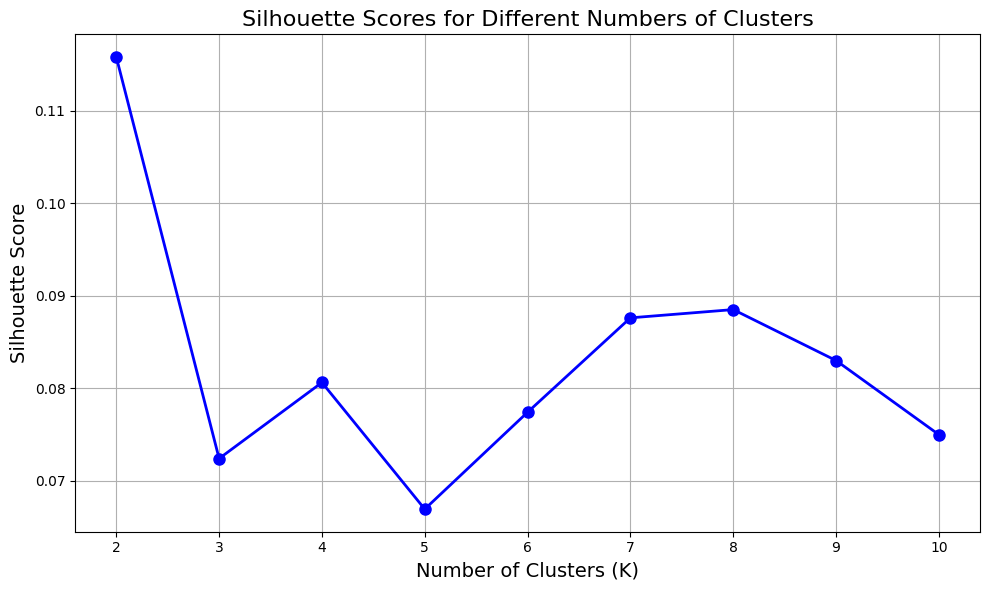

In [54]:
#Takes 5 minutes to run.
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_train is your training data (make sure it's preprocessed and scaled if necessary)
range_n_clusters = list(range(2, 11))
silhouette_scores = []

# Loop through different values of n_clusters to calculate silhouette scores
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)  # Fit the model
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))  # Compute Silhouette Score

# Plot the silhouette scores
plt.figure(figsize=(10, 6))  # Increase the size for better readability
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add labels and title with adjusted font size
plt.xlabel("Number of Clusters (K)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Scores for Different Numbers of Clusters", fontsize=16)

# Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the plot to avoid clipping
plt.show()

Thus, as Silhouette Score Provides a more quantitative measure of cluster quality, we would use K=7, to confirm final Silhouette Score.

In [55]:
#Takes approx: Xx minutes & XX seconds
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-Means Clustering (n_clusters=2 for diabetes vs non-diabetes)
kmeans = KMeans(n_clusters=7, random_state=42) #when 4 lusters, Score is 0.08
kmeans.fit(X_train)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print(f"K-Means Silhouette Score: {silhouette_avg:.2f}")

K-Means Silhouette Score: 0.09


A Silhouette Score of 0.09 suggests that the clustering solution is not very strong. The clusters are likely to be weakly separated, and there may be some overlap or ambiguity in how the data is grouped.

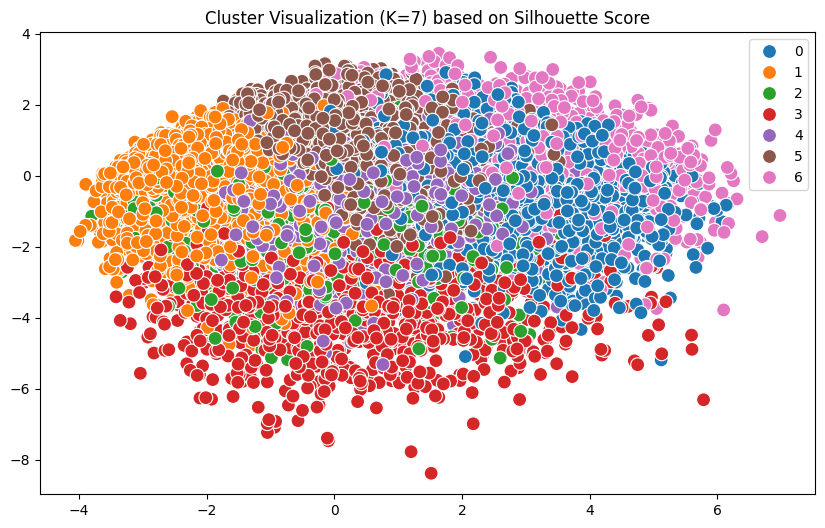

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Fit KMeans with K=7 and predict the cluster labels
kmeans = KMeans(n_clusters=7, random_state=42) #k=7 based on Silhouette Score chart.
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="tab10", s=100)
plt.title("Cluster Visualization (K=7) based on Silhouette Score")
plt.show()


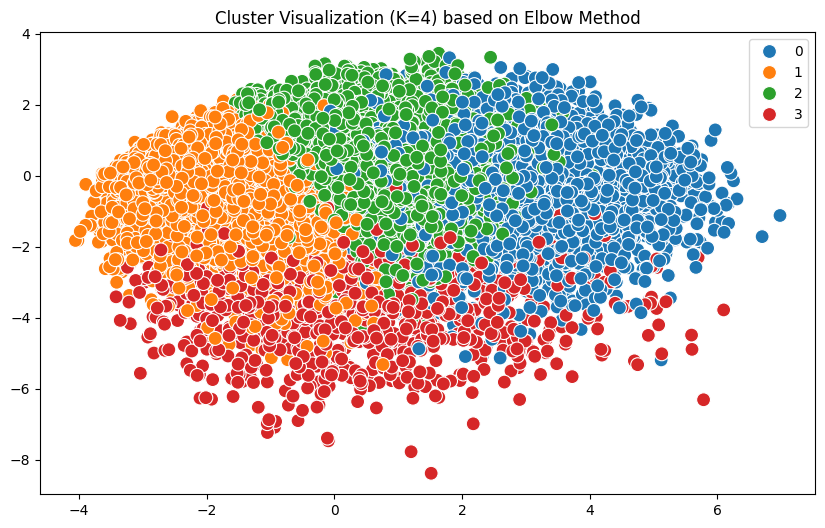

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Fit KMeans with K=7 and predict the cluster labels
kmeans = KMeans(n_clusters=4, random_state=42) #K=4 from Elbow method
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="tab10", s=100)
plt.title("Cluster Visualization (K=4) based on Elbow Method")
plt.show()


- Issue: K-Means assumes that clusters are spherical (i.e., roughly circular) and evenly distributed in space. If your data has irregularly shaped clusters or varying densities, K-Means will not perform well.
- Interpretation: A higher Silhouette Score (closer to 1) indicates that the points are well-clustered.
A lower or negative Silhouette Score suggests that the points may not be well-clustered, meaning that the algorithm might not be separating the data effectively.
- Key Differences Between Silhouette Score and Accuracy:  
    - Accuracy (in supervised learning) measures how many predictions match the true labels. It's a direct measure of performance, where you know the ground truth labels (e.g., in classification tasks).
- Silhouette Score (in unsupervised learning) does not have access to ground truth labels and is used to evaluate how well clusters have been formed by measuring how cohesive (similar) the data points within each cluster are, and how well-separated they are from other clusters.